In [36]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

1. Describe your data set
    - consists of fantasy football data through the first 8 games of the 2017 season
    - includes:
        1. full season data for each Quarterback who has logged a game played
        2. stats for each quarterback in each individual week
        3. stats for what each defense allowed in fantasy points over the first 
           8 weeks
    - it comes from https://www.fantasypros.com/
    - a huge issue in fantasy is deciding which players to start every week when
      you have two players in the same position and you do not know who is 
      likely to get more points in each week. For example the number 1 QB is 
      playing against the number 5 defense and you also have the number 8 QB who 
      is playing against the number 17 defense. In this situation, who is the 
      better play on average?

2. Ask and answer 3 analytical questions
    1. Which QBs in the are league likely perform well based on the strength of 
       their matchup? Look for quarterbacks who's st. dev are higher than a pre-determined amount. These are the guys who are most likely to have their performances based on matchup because the guys who score in between 17-19 points every week are too consistent with the current given data.
          - data to show includes examples of a few QBs who will and will not be included in the data set as well as a table of all the included QB's per game stats
    2. Which of the QBs from the previous question have a real correlation with the strength of the defenses they played against? In the real world, players don't performed based on one specific metric. They might be playing against completely independently of defensive strength.
          - look to correlate the QBs performance with the strength of the defense they played against that week 
    3. Which QB should you start in a given week based on how hard the defense they are playing against is.
          - find an overall average of how much the defensive matchup affects either all QBs or each QB individually. (overall for all QBs would be much, much easier but less accurate) then use the defensive rank in comparison to the average to predict what position in the rankings a QB will fall in following weeks. For example you have QB 1 and QB 10 on your roster. QB 1 is playing against the 7th hardest defense so you expect him to be roughly the 5th overall QB next week and QB 10 is playing rgainst the 30th hardest defense so you expect him to be roughly the 4th overall QB meaning you should start QB 10, or rhe guys who is actually 9 lower in ranking going into the game.

3. Propose further research
    - The correlation and suggestions made in this project only cover QB production versus defensive season strength. In the actual sport of football, production is affected by much more complicated statistics. For example, certain quarterbacks have trouble in certain weather conditions, against certain defensive schemes, or against certain specific players. On the other side, some defenses have problems in certain conditions or against specific players as well. Also, both sides of the ball are very heavily affected by injuries. For example, the Redskins this season came out hot on defense but have since lost 4 defensive starters to injuries, 3 of which are in the secondary. In the beginning of the season I would not want to play QBs against them, but in week 9 I would target their team becasue the backups are just not nearly as good. In terms of stats, they are the 15th defense against QBs putting them smack dab in the middle of the pack, but its unfair to say they shouldn't affect a QBs production in week 2 and 7 because of their average stats because, frankly, they are two different teams in those games.
    - In order to get a more accurate representation one would absolutely need:
        - Defensive strength on a per game basis
        - injury history of the QB's most popular targets
        - injury history of the defensive starters
        - weather history (affects offensive ability to throw and catch much more heavily than the defense)
        - other player specific correlations (ex. home vs. away stats)

[0      31.0
43     16.1
88     15.1
109    27.3
145    26.9
182    15.1
209    25.7
254    13.4
Name: Avg, dtype: float64, 1      27.1
50     13.2
85     16.5
125    10.1
154    15.2
183    14.9
245    18.0
Name: Avg, dtype: float64, 3      22.7
36     22.6
95      7.6
123    11.3
181    15.9
232     5.7
263     7.9
Name: Avg, dtype: float64, 4      18.9
35     24.8
91     13.2
120    15.1
144    27.3
175    21.4
205    31.0
248    17.1
Name: Avg, dtype: float64, 5      18.8
52     13.0
83     19.7
119    15.7
185    14.2
228     8.9
Name: Avg, dtype: float64, 6      18.8
58     10.5
84     17.8
121    12.5
163     8.9
213    20.0
249    16.7
Name: Avg, dtype: float64, 7      18.7
38     21.2
98      5.2
126     9.7
198     6.8
206    30.2
256    12.5
Name: Avg, dtype: float64, 8      18.6
66      1.9
79     22.1
135     3.7
170     2.4
238     0.6
252    15.0
Name: Avg, dtype: float64, 9      17.9
48     14.9
90     13.7
130     8.5
192    11.9
217    17.0
251    15.9
Name: Avg, dtyp

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


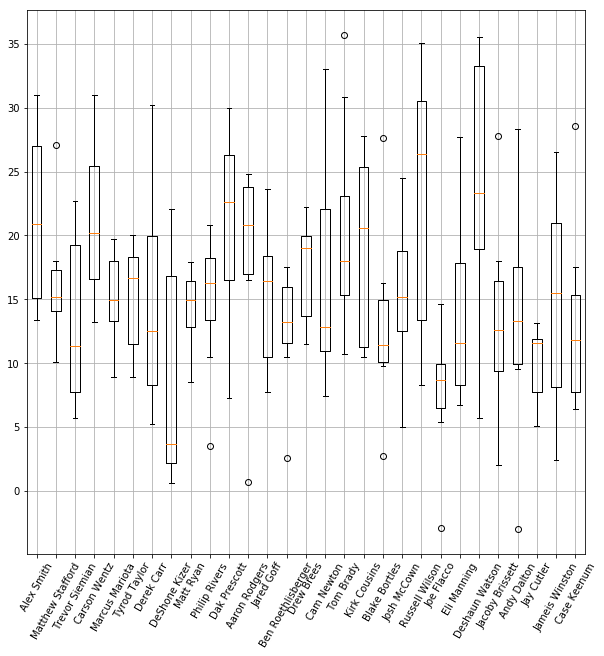

     Rank              Player Team  Points  Games   Avg
0       1          Alex Smith   KC    31.0      1  31.0
1       2    Matthew Stafford  DET    27.1      1  27.1
2       3        Sam Bradford  MIN    25.5      1  25.5
3       4      Trevor Siemian  DEN    22.7      1  22.7
4       5        Carson Wentz  PHI    18.9      1  18.9
5       6      Marcus Mariota  TEN    18.8      1  18.8
6       6        Tyrod Taylor  BUF    18.8      1  18.8
7       7          Derek Carr  OAK    18.7      1  18.7
8       8       DeShone Kizer  CLE    18.6      1  18.6
9       9           Matt Ryan  ATL    17.9      1  17.9
10     10       Philip Rivers  LAC    17.7      1  17.7
11     11        Dak Prescott  DAL    17.1      1  17.1
12     12       Aaron Rodgers   GB    16.5      1  16.5
13     13          Jared Goff  LAR    16.4      1  16.4
14     14  Ben Roethlisberger  PIT    15.7      1  15.7
15     15          Drew Brees   NO    15.6      1  15.6
16     16          Cam Newton  CAR    13.1      

In [37]:
df = pd.read_excel(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\Capstone\FFstats.xlsx', sheetname = 'season')
player = df['Player'].unique()
non_relevant_player = [2, 17, 22, 27, 29, 30, 31, 32, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
relevant_player = np.delete(player, non_relevant_player)
datap = []
for x in relevant_player:
    all_data = df[df['Player'] == x]
    final_data = all_data['Avg']
    datap.append(final_data)
print(datap)
plt.figure(figsize = (10,10))
plt.boxplot(x=datap, labels = (relevant_player))
plt.xticks(rotation=60)
plt.grid()
plt.show()
print(df)

In [38]:
mean_data = df.groupby('Player').mean()
stdev_data = df.groupby('Player').std()
col1 = mean_data.loc[:, ['Avg']] 
col2 = stdev_data.loc[:, ['Avg']] 
print(np.mean(col1))
table = pd.DataFrame(index=player)
table['average FP per game'] = col1
table['standard deviation'] = col2
table.sort_values(by = 'average FP per game', ascending=False)
#or use table.sort_index


Avg    10.474091
dtype: float64


,average FP per game,standard deviation
Deshaun Watson,24.114286,10.754600
Russell Wilson,22.528571,10.766106
Alex Smith,21.325000,7.042067
Carson Wentz,21.100000,6.204607
Dak Prescott,20.785714,8.077217
Tom Brady,20.312500,8.674995
Kirk Cousins,18.871429,7.723927
Aaron Rodgers,17.933333,9.055532
Drew Brees,17.142857,4.262181
Cam Newton,16.637500,9.124056


In [39]:
selector = table['average FP per game'] > 14.63
new_table = table[selector]
print('Average Standard Deviation')
print(np.mean(new_table['standard deviation']))
print('Average Fantasy Points for any QB in this list')
print(np.mean(new_table['average FP per game']))
print('Standard Deviation of the Standard Deviation')
print(np.std(new_table['standard deviation']))
print('Standard Deviation of the Average')
print(np.std(new_table['average FP per game']))
new_table.round(2).sort_values(by = 'standard deviation', ascending=False)

Average Standard Deviation
7.27401931463
Average Fantasy Points for any QB in this list
17.8866732804
Standard Deviation of the Standard Deviation
2.11086118484
Standard Deviation of the Average
2.99785167669


,average FP per game,standard deviation
Russell Wilson,22.53,10.77
Deshaun Watson,24.11,10.75
Jameis Winston,14.64,9.19
Cam Newton,16.64,9.12
Aaron Rodgers,17.93,9.06
Derek Carr,14.90,8.95
Tom Brady,20.31,8.67
Dak Prescott,20.79,8.08
Kirk Cousins,18.87,7.72
Alex Smith,21.32,7.04


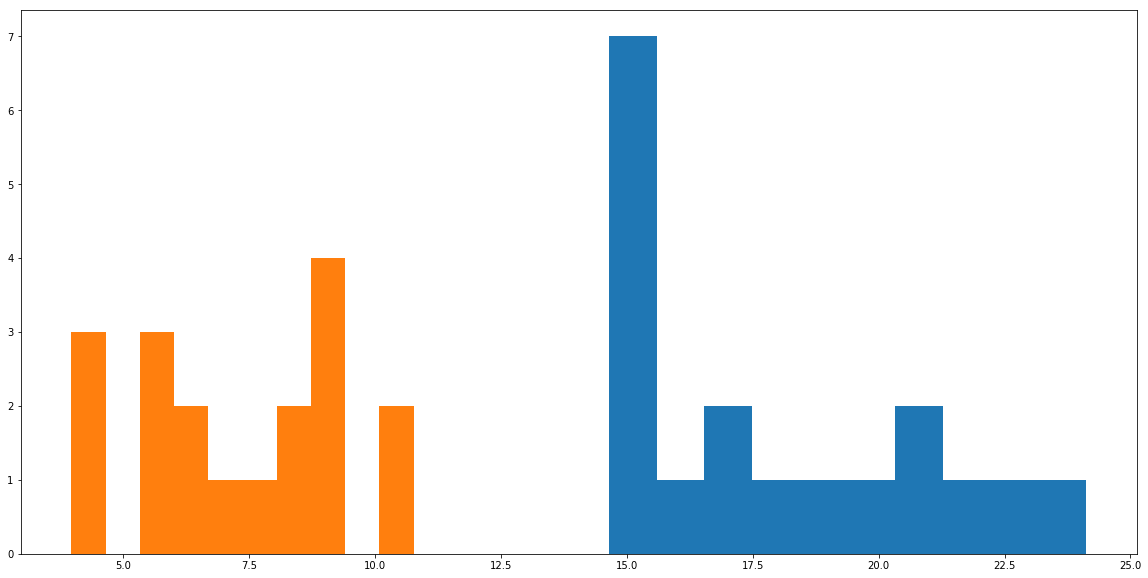

In [40]:
plt.figure(figsize=(20,10))
plt.hist(new_table['average FP per game'])
plt.hist(new_table['standard deviation'])
plt.show()

In [41]:
selector1 = table['standard deviation'] > 6.15 
final_table = table[selector & selector1]
final_player_list = final_table.drop(['Aaron Rodgers'])
final_player_list.round(2).sort_values(by = 'average FP per game', ascending=False)

,average FP per game,standard deviation
Deshaun Watson,24.11,10.75
Russell Wilson,22.53,10.77
Alex Smith,21.32,7.04
Carson Wentz,21.10,6.20
Dak Prescott,20.79,8.08
Tom Brady,20.31,8.67
Kirk Cousins,18.87,7.72
Cam Newton,16.64,9.12
Derek Carr,14.90,8.95
Jameis Winston,14.64,9.19


In [42]:
sf = pd.read_excel(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\Capstone\FFstats.xlsx', sheetname = 'strength')
players = sf['Player']
sf = sf.replace('BYE', np.nan)
print(sf)
print(sf.info())

    ECR                Player     1   2   3   4     5     6     7     8
0     1             Tom Brady  24.0  15  29   6  26.0  22.0  17.0  10.0
1     2          Dak Prescott  27.0  13  30   8  14.0   NaN  31.0  18.0
2     3        Russell Wilson  14.0  31  20  28   8.0   NaN  27.0  29.0
3     4        Deshaun Watson   1.0  12  32  20  24.0  25.0   NaN  11.0
4     5            Drew Brees   5.0  32   6  16   NaN   9.0  14.0   7.0
5     6          Carson Wentz  18.0  24  27  10  30.0   6.0  18.0  31.0
6     7        Marcus Mariota  21.0   1  11  29  16.0  28.0  25.0   NaN
7     8          Kirk Cousins  23.0   8  21  24   NaN  31.0  23.0  19.0
8     9             Matt Ryan   7.0  14   9   4   NaN  16.0  32.0  22.0
9    10            Alex Smith  32.0  23  10  18  29.0   3.0  21.0  13.0
10   11            Cam Newton  31.0   4  15  32   9.0  23.0   7.0  26.0
11   12          Tyrod Taylor  22.0   6  13  17  12.0   NaN  26.0  21.0
12   13      Matthew Stafford  30.0  27  17   5   6.0  15.0   Na

In [43]:
my_matchup_data = {}
final_player_list.index
for x in final_player_list.index:
    all_data = sf[sf['Player'] == x]
    final_data = all_data.iloc[0, 2:10]
    selected_data = pd.isnull(final_data)
    my_matchup_data[x] = final_data[~selected_data]
print(my_matchup_data)

{'Alex Smith': 1    32
2    23
3    10
4    18
5    29
6     3
7    21
8    13
Name: 9, dtype: object, 'Carson Wentz': 1    18
2    24
3    27
4    10
5    30
6     6
7    18
8    31
Name: 5, dtype: object, 'Derek Carr': 1    20
2    22
3    18
4    13
5     2
6    10
7    24
8     4
Name: 16, dtype: object, 'Dak Prescott': 1    27
2    13
3    30
4     8
5    14
7    31
8    18
Name: 1, dtype: object, 'Cam Newton': 1    31
2     4
3    15
4    32
5     9
6    23
7     7
8    26
Name: 10, dtype: object, 'Tom Brady': 1    24
2    15
3    29
4     6
5    26
6    22
7    17
8    10
Name: 0, dtype: object, 'Kirk Cousins': 1    23
2     8
3    21
4    24
6    31
7    23
8    19
Name: 7, dtype: object, 'Russell Wilson': 1    14
2    31
3    20
4    28
5     8
7    27
8    29
Name: 2, dtype: object, 'Deshaun Watson': 1     1
2    12
3    32
4    20
5    24
6    25
8    11
Name: 3, dtype: object, 'Jameis Winston': 2     7
3     5
4    27
5    32
6    30
7     4
8     6
Name: 13, dtype: object}

In [44]:
all_players = {}
for x in player:
    all_data = df[df['Player'] == x]
    final_data = all_data['Avg']
    all_players[x] = final_data

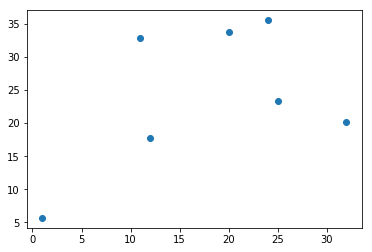

In [45]:
plt.scatter(y = all_players['Deshaun Watson'], x = my_matchup_data['Deshaun Watson'])
plt.show()

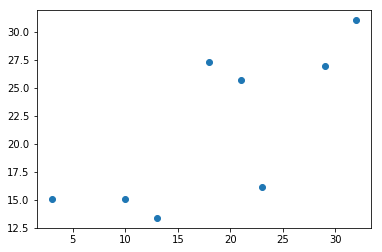

In [46]:
plt.scatter(y = all_players['Alex Smith'], x = my_matchup_data['Alex Smith'])
plt.show()

In [47]:
print(ttest_ind(all_players['Alex Smith'], my_matchup_data['Alex Smith'], equal_var=False))
print(ttest_ind(all_players['Deshaun Watson'], my_matchup_data['Deshaun Watson'], equal_var=False))
print(ttest_ind(all_players['Russell Wilson'], my_matchup_data['Russell Wilson'], equal_var=False))
print(ttest_ind(all_players['Carson Wentz'], my_matchup_data['Carson Wentz'], equal_var=False))
print(ttest_ind(all_players['Dak Prescott'], my_matchup_data['Dak Prescott'], equal_var=False))
print(ttest_ind(all_players['Tom Brady'], my_matchup_data['Tom Brady'], equal_var=False))
print(ttest_ind(all_players['Kirk Cousins'], my_matchup_data['Kirk Cousins'], equal_var=False))
print(ttest_ind(all_players['Cam Newton'], my_matchup_data['Cam Newton'], equal_var=False))
print(ttest_ind(all_players['Derek Carr'], my_matchup_data['Derek Carr'], equal_var=False))
print(ttest_ind(all_players['Jameis Winston'], my_matchup_data['Jameis Winston'], equal_var=False))

Ttest_indResult(statistic=0.63607751306762972, pvalue=0.53597010322051264)
Ttest_indResult(statistic=1.1025030278337846, pvalue=0.29187783005554924)
Ttest_indResult(statistic=0.019117573792481531, pvalue=0.98507522756657417)
Ttest_indResult(statistic=0.15333216374060185, pvalue=0.88062271722830476)
Ttest_indResult(statistic=0.13931443439475422, pvalue=0.89154789139771062)
Ttest_indResult(statistic=0.40366495222570359, pvalue=0.69259255492204419)
Ttest_indResult(statistic=-0.6149399558027312, pvalue=0.55020434434907317)
Ttest_indResult(statistic=-0.34232908015331359, pvalue=0.73737370075620978)
Ttest_indResult(statistic=0.1734630044468079, pvalue=0.86509221877140785)
Ttest_indResult(statistic=-0.201452157634671, pvalue=0.84409351771272867)


In [48]:
median_alexsmith = my_matchup_data['Alex Smith'].median()
less_than = my_matchup_data['Alex Smith'] < median_alexsmith
group1 = all_players['Alex Smith'][less_than.values]
group2 = all_players['Alex Smith'][~less_than.values]
print(ttest_ind(group1, group2, equal_var=False))

Ttest_indResult(statistic=-1.5985041579281156, pvalue=0.16106627738079035)


In [49]:
selector = table['average FP per game'] > 13
new_table = table[selector].drop(['Aaron Rodgers', 'Sam Bradford'])
new_table

,average FP per game,standard deviation
Alex Smith,21.325000,7.042067
Matthew Stafford,16.428571,5.333452
Trevor Siemian,13.385714,7.129383
Carson Wentz,21.100000,6.204607
Marcus Mariota,15.050000,3.971272
Tyrod Taylor,15.028571,4.356495
Derek Carr,14.900000,8.950978
Matt Ryan,14.257143,3.238239
Philip Rivers,14.900000,5.641428
Dak Prescott,20.785714,8.077217


In [50]:
data_plz = {}
new_table.index
for x in new_table.index:
    all_data = sf[sf['Player'] == x]
    print(all_data)
    final_data = all_data.iloc[0, 2:10]
    selected_data = pd.isnull(final_data)
    data_plz[x] = final_data[~selected_data]
print(data_plz)

   ECR      Player     1   2   3   4     5    6     7     8
9   10  Alex Smith  32.0  23  10  18  29.0  3.0  21.0  13.0
    ECR            Player     1   2   3  4    5     6   7    8
12   13  Matthew Stafford  30.0  27  17  5  6.0  15.0 NaN  3.0
    ECR          Player     1   2  3   4   5     6     7     8
20   21  Trevor Siemian  10.0  19  4  21 NaN  27.0  10.0  24.0
   ECR        Player     1   2   3   4     5    6     7     8
5    6  Carson Wentz  18.0  24  27  10  30.0  6.0  18.0  31.0
   ECR          Player     1  2   3   4     5     6     7   8
6    7  Marcus Mariota  21.0  1  11  29  16.0  28.0  25.0 NaN
    ECR        Player     1  2   3   4     5   6     7     8
11   12  Tyrod Taylor  22.0  6  13  17  12.0 NaN  26.0  21.0
    ECR      Player     1   2   3   4    5     6     7    8
16   17  Derek Carr  20.0  22  18  13  2.0  10.0  24.0  4.0
   ECR     Player    1   2  3  4   5     6     7     8
8    9  Matt Ryan  7.0  14  9  4 NaN  16.0  32.0  22.0
    ECR         Player     1

IndexError: single positional indexer is out-of-bounds

In [51]:
print('Average Standard Deviation')
print(np.mean(new_table['standard deviation']))
print('Average Fantasy Points for any QB in this list')
print(np.mean(new_table['average FP per game']))
print('Standard Deviation of the Standard Deviation')
print(np.std(new_table['standard deviation']))
print('Standard Deviation of the Average')
print(np.std(new_table['average FP per game']))
print('number of players')
print(len(new_table['average FP per game']))
new_table.round(2).sort_values(by = 'standard deviation', ascending=False)

Average Standard Deviation
7.18347121639
Average Fantasy Points for any QB in this list
16.5370714286
Standard Deviation of the Standard Deviation
2.00040420855
Standard Deviation of the Average
3.22657445668
number of players
25


,average FP per game,standard deviation
Russell Wilson,22.53,10.77
Deshaun Watson,24.11,10.75
Andy Dalton,13.36,9.59
Jameis Winston,14.64,9.19
Cam Newton,16.64,9.12
Derek Carr,14.90,8.95
Tom Brady,20.31,8.67
Dak Prescott,20.79,8.08
Eli Manning,14.01,8.05
Case Keenum,13.27,7.80
